In [1]:
import time
t0 = time.time()
import csoundengine as ce
print(time.time() - t0)


0.2680177688598633


In [2]:
s = ce.Session(latency=0.005)

--Csound version 7.0 (double samples) Apr 22 2025
[commit: aaef34d3edf888cb46d6a8ba0e0b5a81d49db6a3]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
s.defInstr('foo', r'''
|kmidi=60, kamp=0.1|
outch 1, vco2:a(kamp, mtof:k(kmidi))
''')

Instr(foo, kmidi=60, kamp=0.1)

Testing how tight the scheduling is

In [6]:
sy = s.sched('foo')
sy

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ foo=501.0002 start=5.318 dur=-1.000 p5=60 kmidi=0.1)

In [7]:
sy.automate('kmidi', (0, 60, 2, 72, 4, 60))

11

In [8]:
# Worst case, no sync at all

for j in range(10):
    for i in range(100):
        sy = s.sched('foo', dur=0.01, kmidi=36+i*0.1, delay=j*0.5+0.01, kamp=0.01)
        

In [9]:
# The engine's clock is locked during the context manager

s.engine.extraLatency = 0.0
J = 10
N = 80
delayfact = .5
    
with s: 
    for j in range(J):
        for i in range(N): 
            sy = s.sched('foo', dur=0.005, kmidi=24+i*0.25, delay=j*delayfact+0.05, kamp=0.6/N)
        

using handler, evet:  Event(instrname='foo', delay=0.0, dur=0.005, priority=1, args=(), whenfinished=None, p1=0.0, relative=True, kws={'kmidi': 48.0, 'kamp': 0.01}, uniqueId=0, automations=None)
using handler, evet:  Event(instrname='foo', delay=0.0, dur=0.005, priority=1, args=(), whenfinished=None, p1=0.0, relative=True, kws={'kmidi': 48.1, 'kamp': 0.01}, uniqueId=0, automations=None)
using handler, evet:  Event(instrname='foo', delay=0.0, dur=0.005, priority=1, args=(), whenfinished=None, p1=0.0, relative=True, kws={'kmidi': 48.2, 'kamp': 0.01}, uniqueId=0, automations=None)
using handler, evet:  Event(instrname='foo', delay=0.0, dur=0.005, priority=1, args=(), whenfinished=None, p1=0.0, relative=True, kws={'kmidi': 48.3, 'kamp': 0.01}, uniqueId=0, automations=None)
using handler, evet:  Event(instrname='foo', delay=0.0, dur=0.005, priority=1, args=(), whenfinished=None, p1=0.0, relative=True, kws={'kmidi': 48.4, 'kamp': 0.01}, uniqueId=0, automations=None)
using handler, evet:  Eve


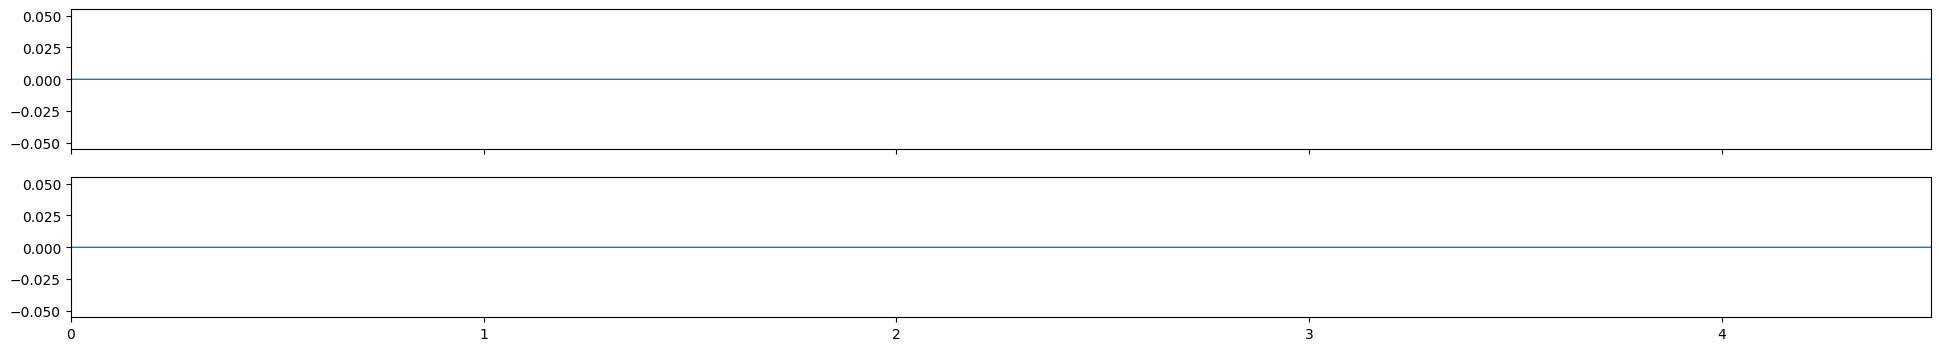

In [4]:
# Ground truth: offline rendering

J = 10
N = 80
delayfact = .5

with s.rendering(verbose=False) as r:
    for j in range(J):
        for i in range(N):
            sy = s.sched('foo', dur=0.005, kmidi=48+i*0.1, delay=j*delayfact, kamp=0.01)
r
# r.writeCsd("~/tmp/impulses.csd")

In [ ]:
s.defInstr('ifoo', r'''
|imidi=60, iamp=0.1|
outch 1, oscili:a(iamp, mtof(imidi))
''')

In [ ]:
s.engine.extraLatency = 0.
with s.engine.lockedClock():
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.01, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
        

In [ ]:
with s.rendering(endtime=8, verbose=False) as r:
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.005, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
r
# r.writeCsd("~/tmp/impulses.csd")